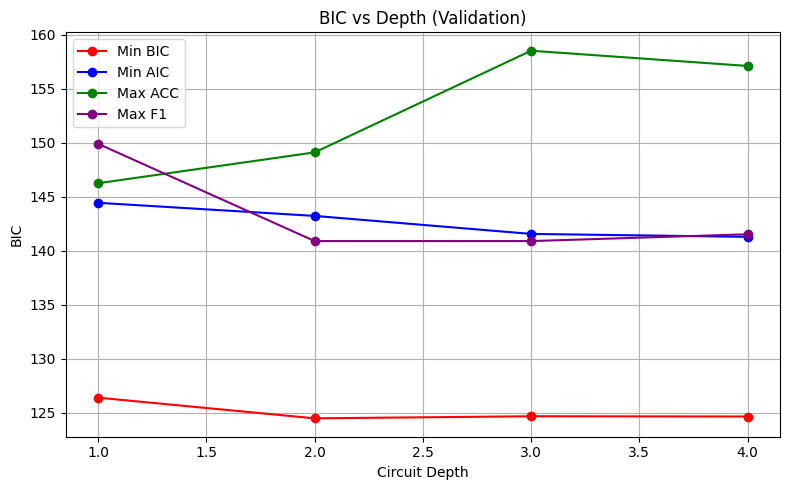

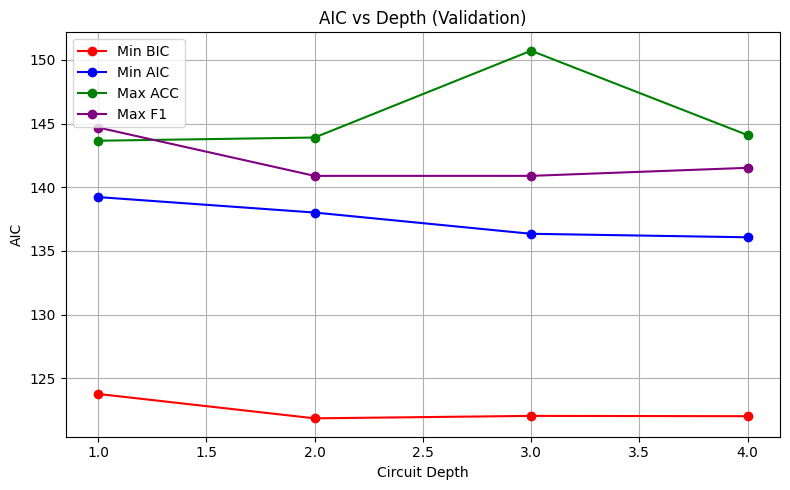

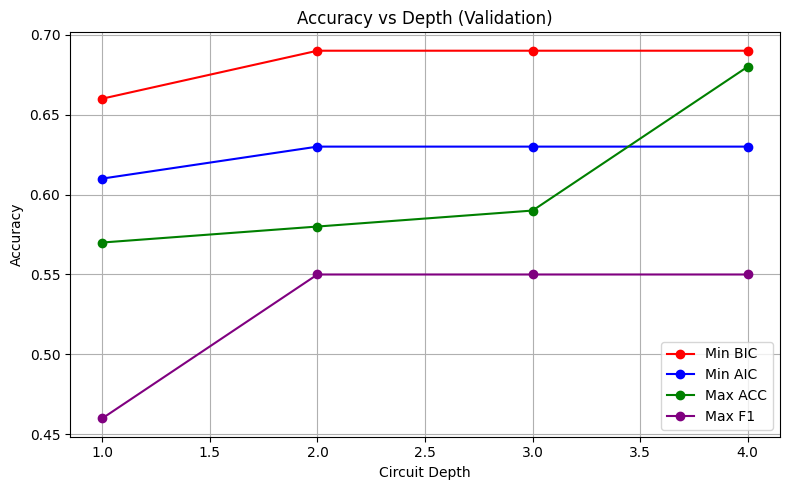

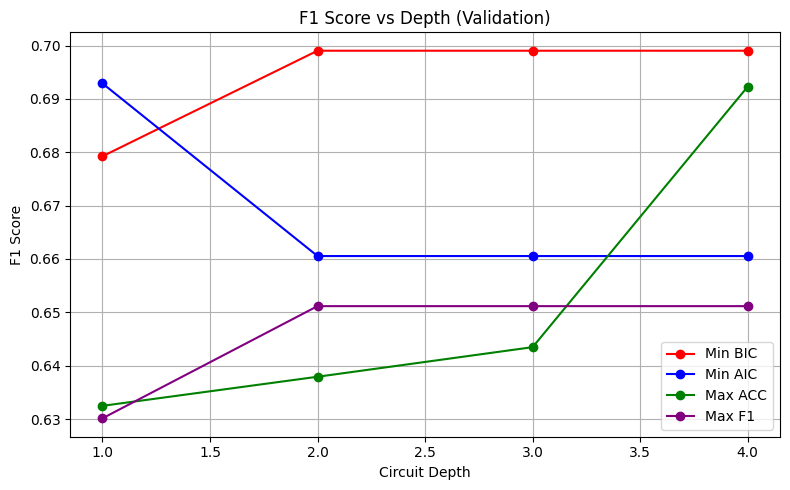

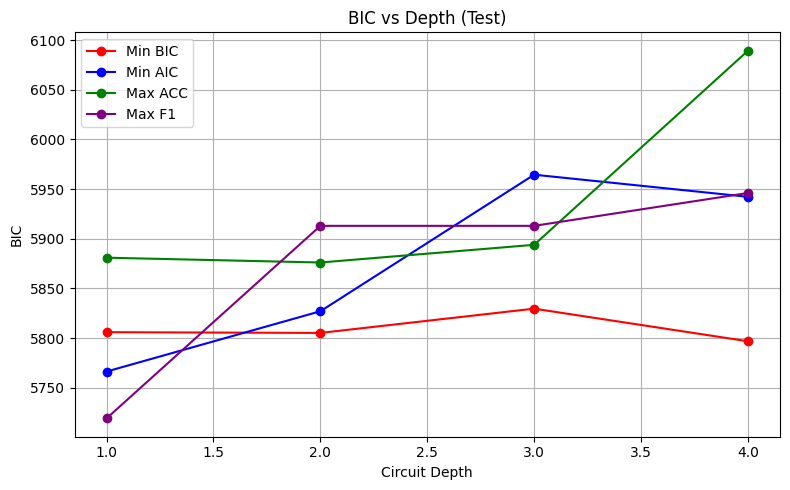

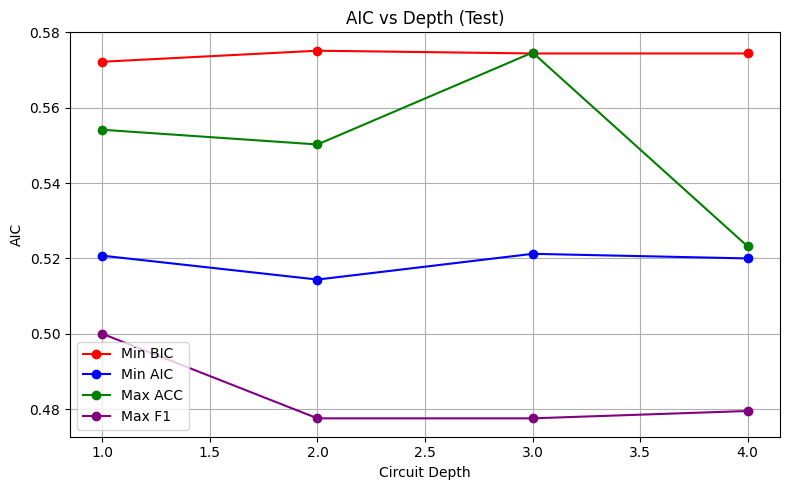

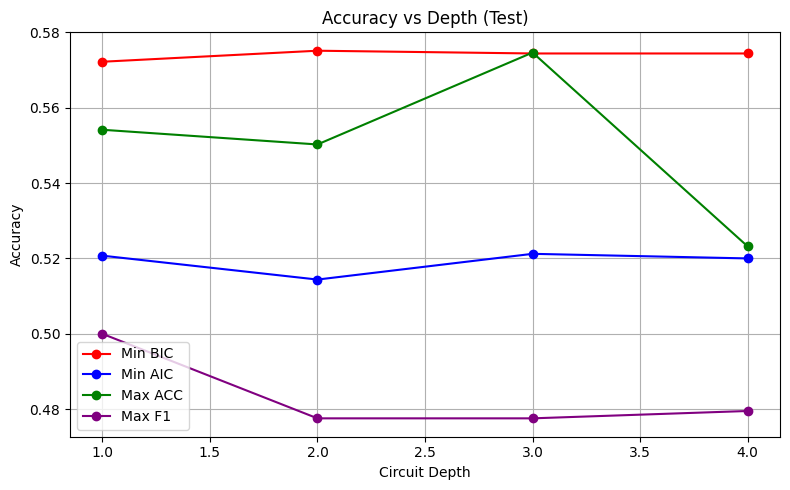

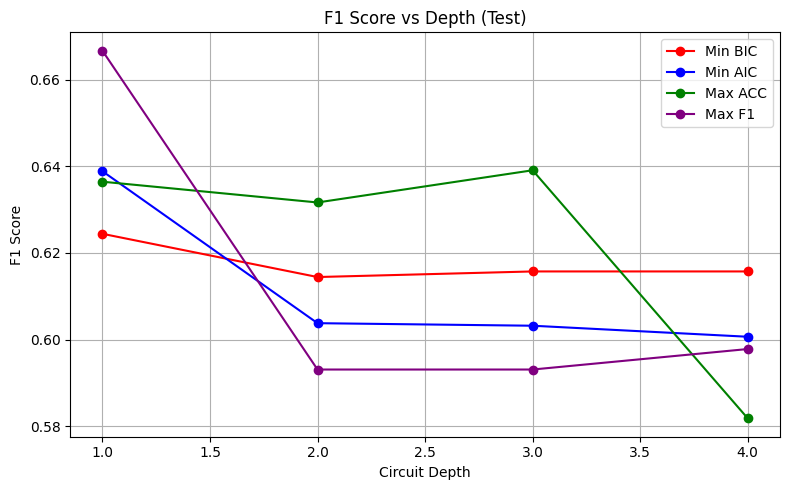

In [11]:
import numpy as np
from typing import List
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm as tqdm
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd
from collections import Counter
from qiskit_machine_learning.utils import algorithm_globals
from pqdm.processes import pqdm
import json


def create_pennylane_circuit(instructions: List[List[int]]):
    dev = qml.device("default.qubit", wires=QUBITS)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(xparams[q], wires=q)

        idx = 0
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])
        return qml.state()

    return circuit



# File mapping
file_map = {
    "Min BIC": "data_bic.json",
    "Min AIC": "data_aic.json",
    "Max ACC": "data_acc1.json",
    "Max F1": "data_f12.json",
}

# Indices
IDX = {
    "depth": 1,
    "aic": 4,
    "bic": 5,
    "acc": 6,
    "f1": 8,
    "aic_test": 9,
    "bic_test": 10,
    "acc_test": 11,
    "f1_test": 13,
}

colors = {
    "Min BIC": "red",
    "Min AIC": "blue",
    "Max ACC": "green",
    "Max F1": "purple",
}

# Load data
data_by_method = {}

for label, fname in file_map.items():
    with open(fname, "r") as f:
        records = json.load(f)
    depth_data = {}
    for r in records:
        depth = r[IDX["depth"]]
        if depth not in depth_data:
            depth_data[depth] = {
                "aic": [], "bic": [], "acc": [], "f1": [],
                "aic_test": [], "bic_test": [], "acc_test": [], "f1_test": [],
            }
        for key in depth_data[depth]:
            depth_data[depth][key].append(r[IDX[key]])
    # Average metrics per depth
    for d in depth_data:
        for key in depth_data[d]:
            depth_data[d][key] = np.mean(depth_data[d][key])
    data_by_method[label] = depth_data

# Plotting helper
def plot_metric(metric_key, ylabel, title_suffix):
    plt.figure(figsize=(8, 5))
    for label, data in data_by_method.items():
        depths = sorted(data.keys())
        values = [data[d][metric_key] for d in depths]
        plt.plot(depths, values, marker="o", label=label, color=colors[label])
    plt.xlabel("Circuit Depth")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Depth ({title_suffix})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot validation metrics
plot_metric("bic", "BIC", "Validation")
plot_metric("aic", "AIC", "Validation")
plot_metric("acc", "Accuracy", "Validation")
plot_metric("f1", "F1 Score", "Validation")

# Plot test metrics
plot_metric("bic_test", "BIC", "Test")
plot_metric("aic_test", "AIC", "Test")
plot_metric("acc_test", "Accuracy", "Test")
plot_metric("f1_test", "F1 Score", "Test")


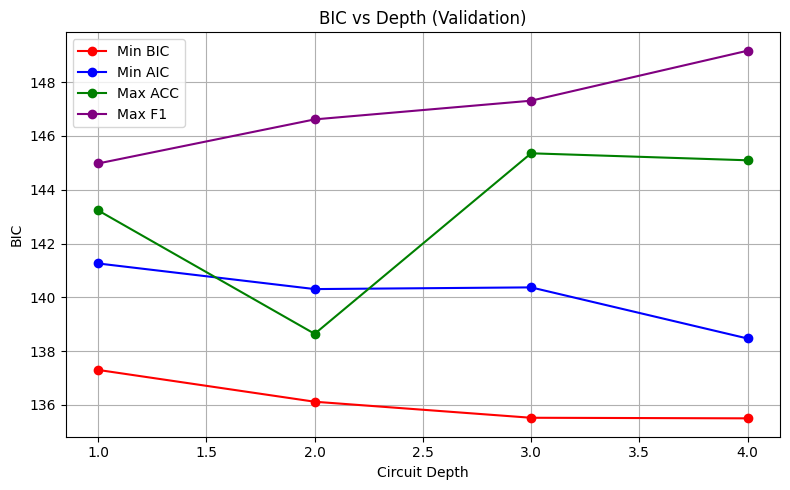

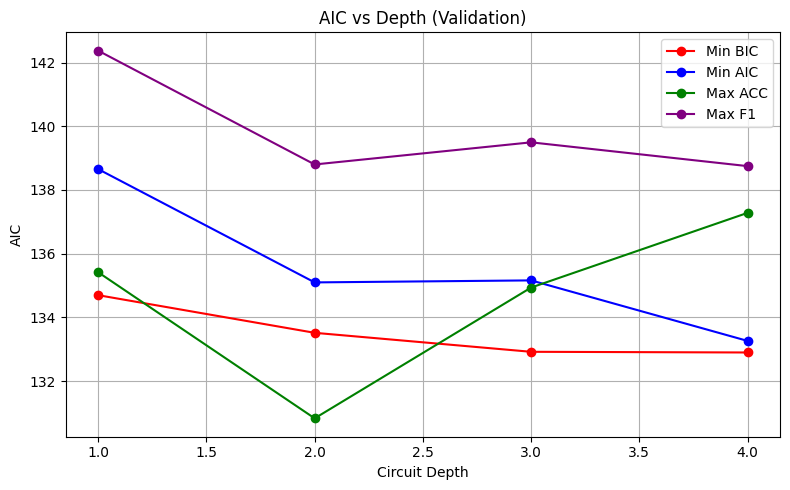

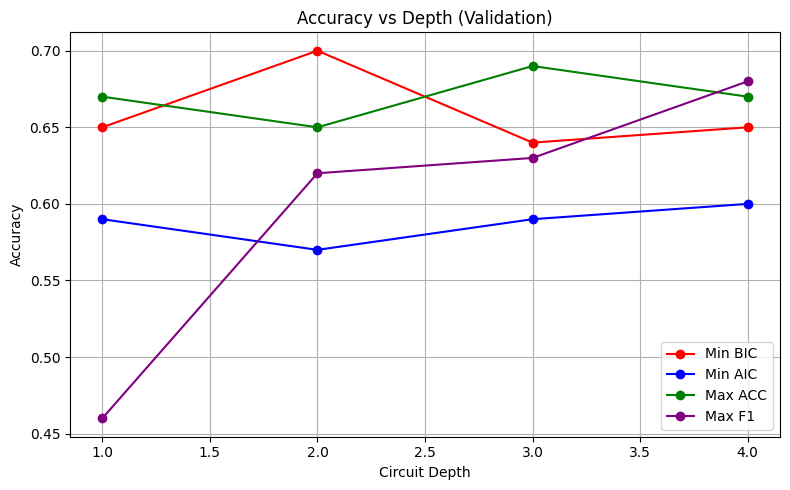

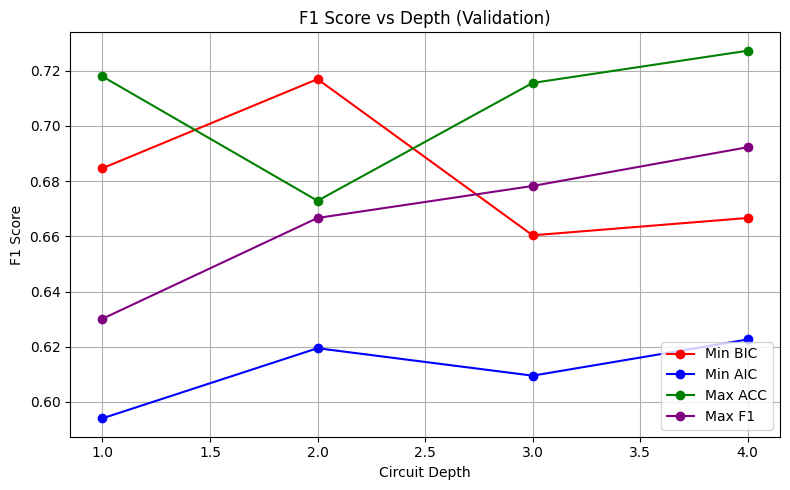

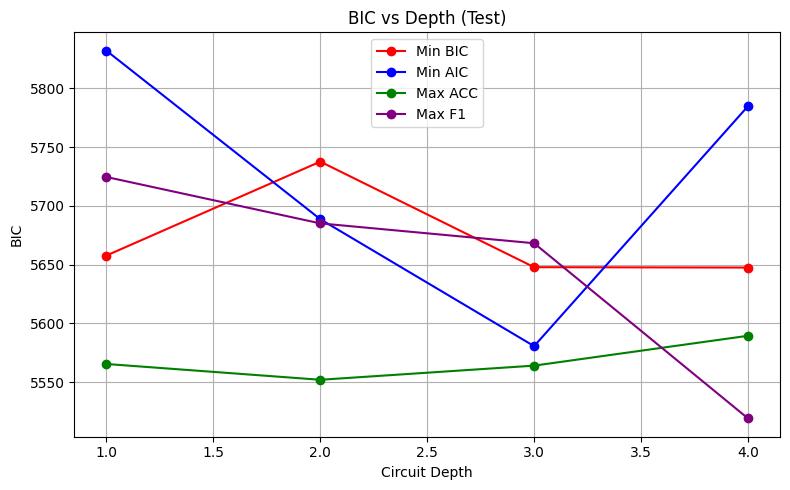

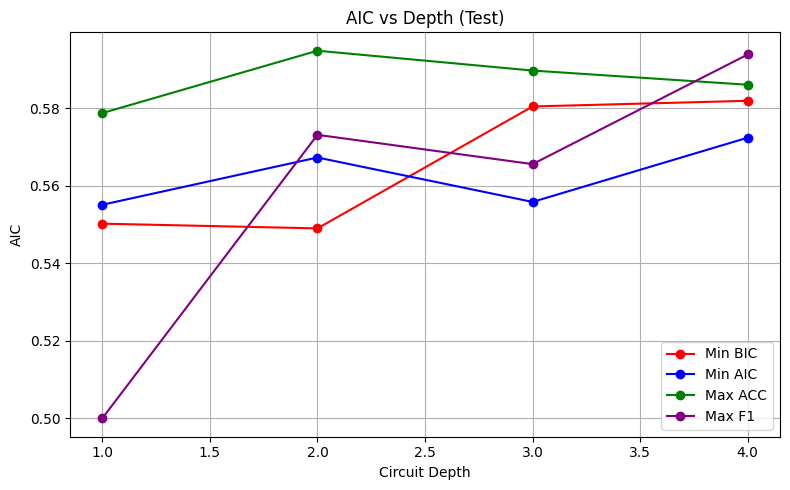

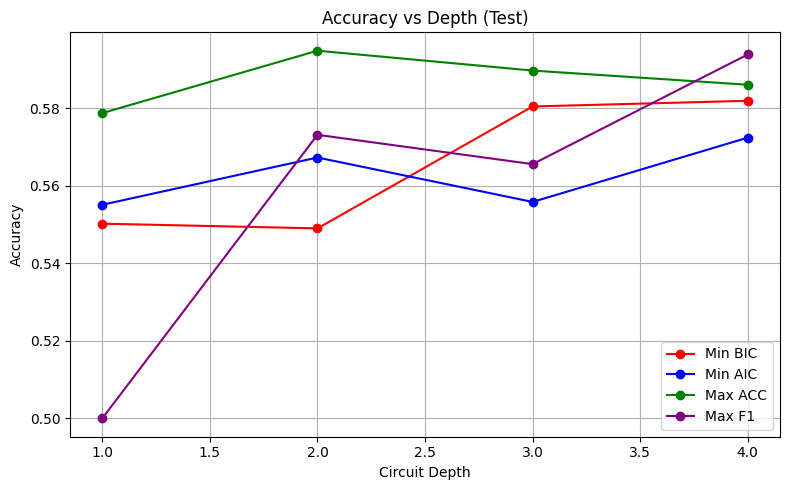

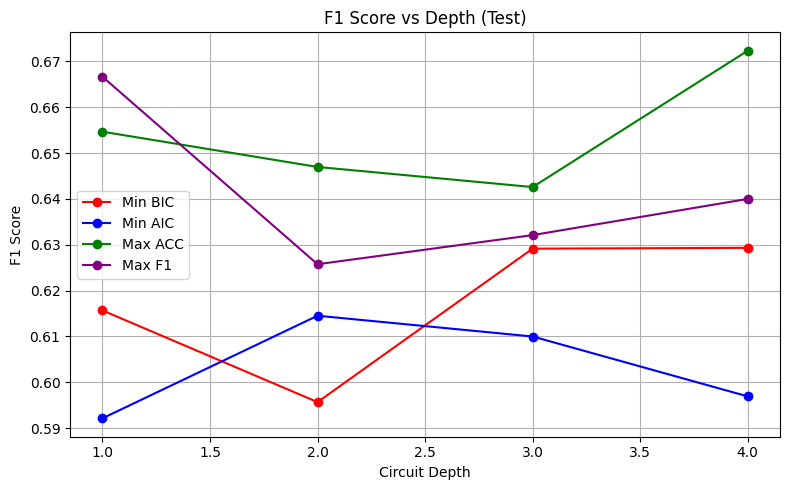

In [26]:
import numpy as np
from typing import List
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm as tqdm
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd
from collections import Counter
from qiskit_machine_learning.utils import algorithm_globals
from pqdm.processes import pqdm
import json


def create_pennylane_circuit(instructions: List[List[int]]):
    dev = qml.device("default.qubit", wires=QUBITS)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(xparams[q], wires=q)

        idx = 0
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])
        return qml.state()

    return circuit



# File mapping
file_map = {
    "Min BIC": "data_bic7.json",
    "Min AIC": "data_aic7.json",
    "Max ACC": "data_acc7.json",
    "Max F1": "data_f17.json",
}

# Indices
IDX = {
    "depth": 1,
    "aic": 4,
    "bic": 5,
    "acc": 6,
    "f1": 8,
    "aic_test": 9,
    "bic_test": 10,
    "acc_test": 11,
    "f1_test": 13,
}

colors = {
    "Min BIC": "red",
    "Min AIC": "blue",
    "Max ACC": "green",
    "Max F1": "purple",
}

# Load data
data_by_method = {}

for label, fname in file_map.items():
    with open(fname, "r") as f:
        records = json.load(f)
    depth_data = {}
    for r in records:
        depth = r[IDX["depth"]]
        if depth not in depth_data:
            depth_data[depth] = {
                "aic": [], "bic": [], "acc": [], "f1": [],
                "aic_test": [], "bic_test": [], "acc_test": [], "f1_test": [],
            }
        for key in depth_data[depth]:
            depth_data[depth][key].append(r[IDX[key]])
    # Average metrics per depth
    for d in depth_data:
        for key in depth_data[d]:
            depth_data[d][key] = np.mean(depth_data[d][key])
    data_by_method[label] = depth_data

# Plotting helper
def plot_metric(metric_key, ylabel, title_suffix):
    plt.figure(figsize=(8, 5))
    for label, data in data_by_method.items():
        depths = sorted(data.keys())
        values = [data[d][metric_key] for d in depths]
        plt.plot(depths, values, marker="o", label=label, color=colors[label])
    plt.xlabel("Circuit Depth")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Depth ({title_suffix})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot validation metrics
plot_metric("bic", "BIC", "Validation")
plot_metric("aic", "AIC", "Validation")
plot_metric("acc", "Accuracy", "Validation")
plot_metric("f1", "F1 Score", "Validation")

# Plot test metrics
plot_metric("bic_test", "BIC", "Test")
plot_metric("aic_test", "AIC", "Test")
plot_metric("acc_test", "Accuracy", "Test")
plot_metric("f1_test", "F1 Score", "Test")


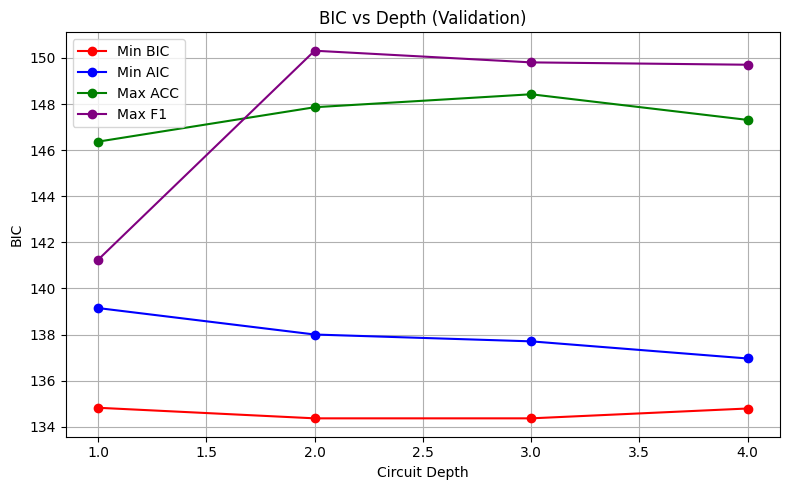

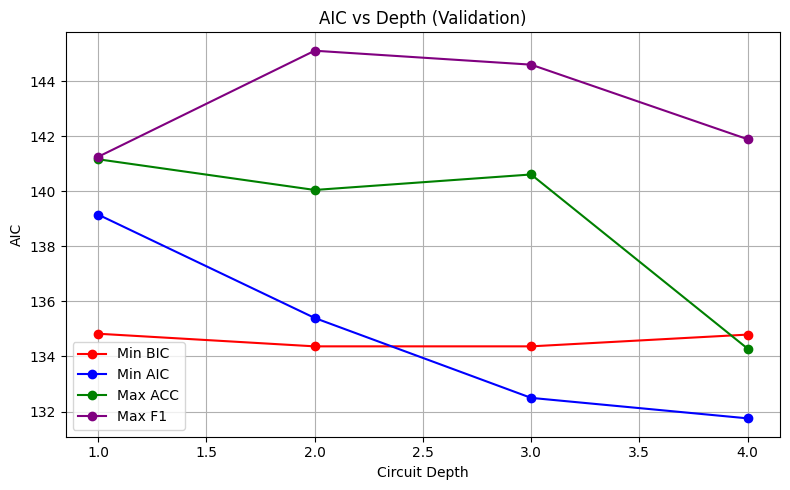

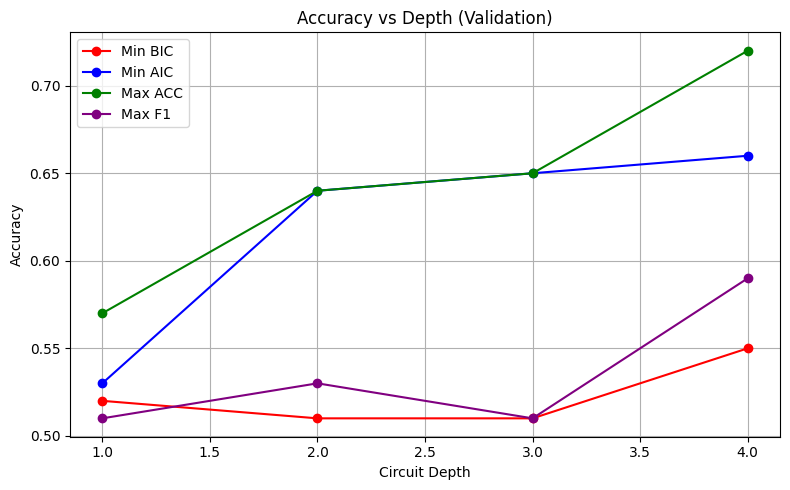

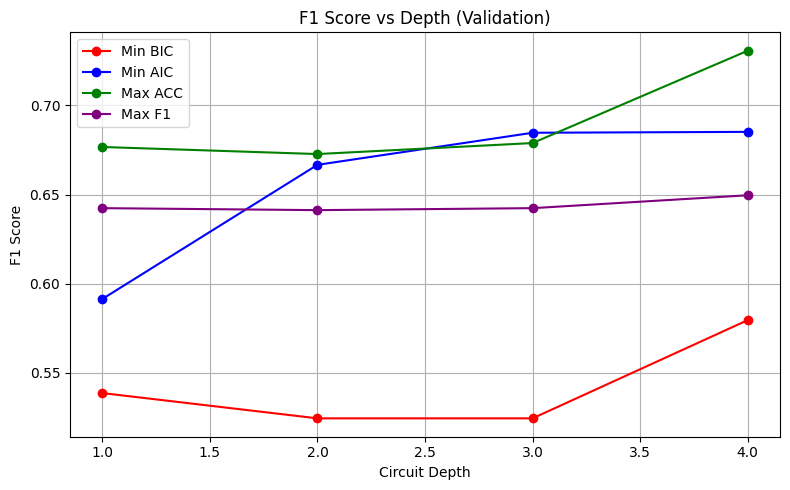

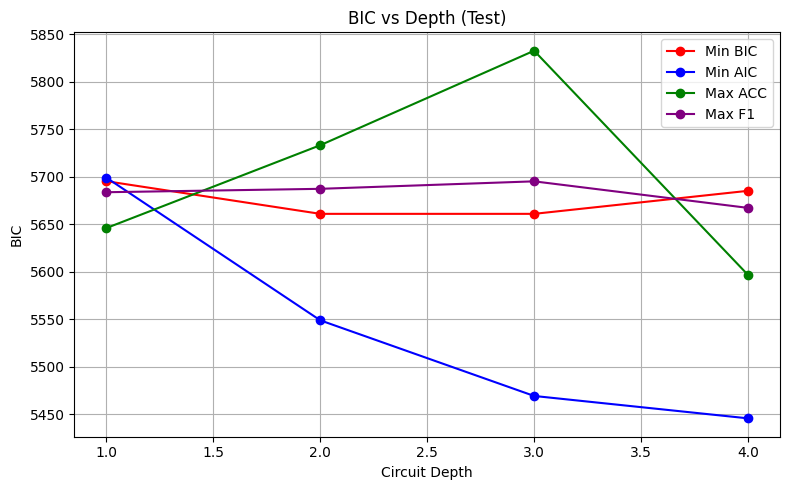

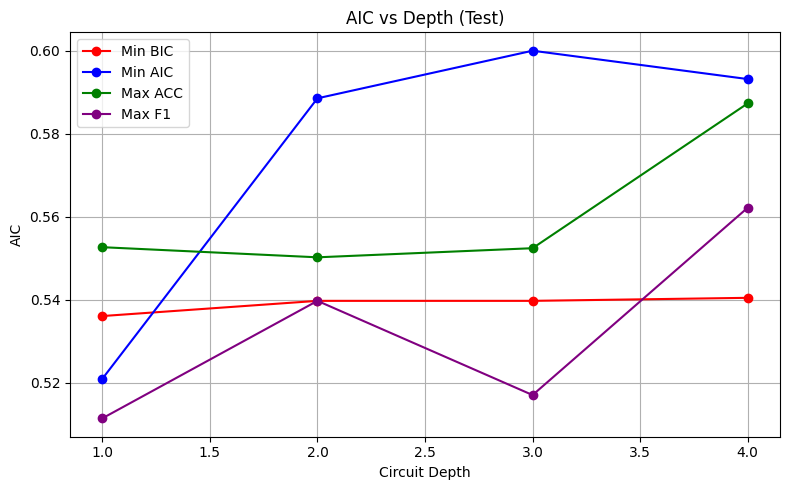

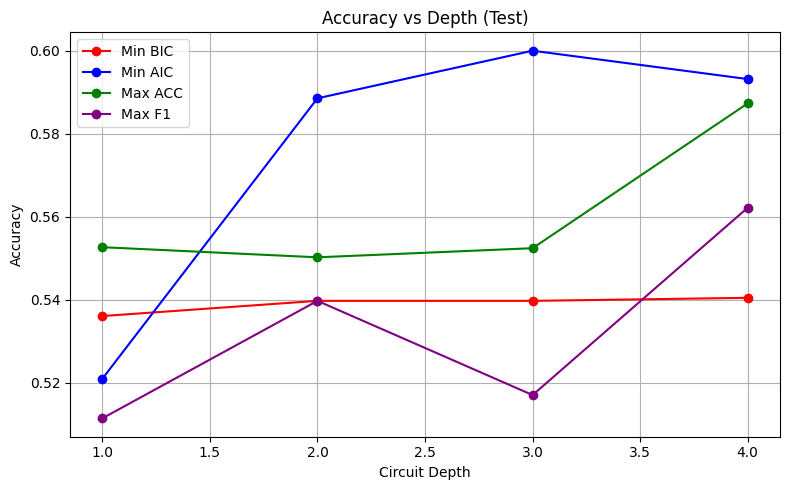

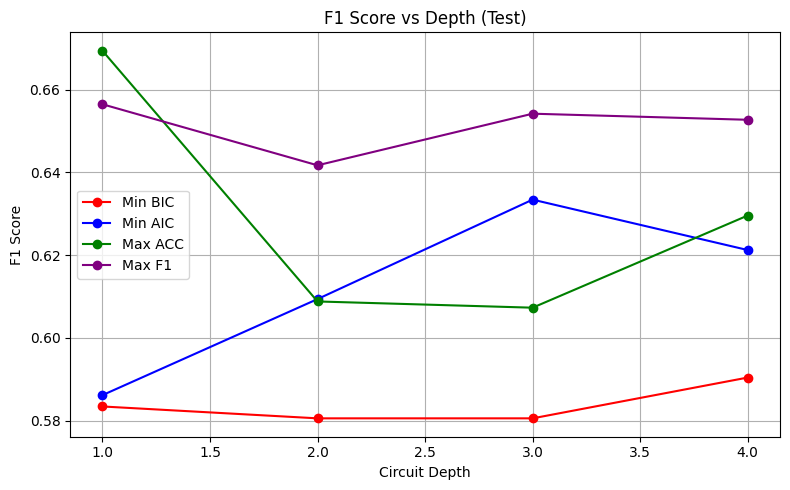

In [12]:
import numpy as np
from typing import List
import pennylane as qml
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
import matplotlib
from tqdm.notebook import tqdm as tqdm
from skopt import gp_minimize
from skopt.space import Real
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import pandas as pd
from collections import Counter
from qiskit_machine_learning.utils import algorithm_globals
from pqdm.processes import pqdm
import json


def create_pennylane_circuit(instructions: List[List[int]]):
    dev = qml.device("default.qubit", wires=QUBITS)

    @qml.qnode(dev)
    def circuit(xparams=[], yparams=[]):
        for q in range(QUBITS):
            qml.Hadamard(wires=q)
            qml.RX(xparams[q], wires=q)

        idx = 0
        for layer in instructions:
            for qbit, op in enumerate(layer):
                if op == 0:
                    continue
                elif op == 1:
                    qml.Hadamard(wires=qbit)
                elif op == 2:
                    qml.RZ(yparams[idx], wires=qbit)
                    idx += 1
                elif op >= 3:
                    qml.CNOT(wires=[qbit, qbit - op + 2])
        return qml.state()

    return circuit



# File mapping
file_map = {
    "Min BIC": "data_bic5.json",
    "Min AIC": "data_aic5.json",
    "Max ACC": "data_acc5.json",
    "Max F1": "data_f15.json",
}

# Indices
IDX = {
    "depth": 1,
    "aic": 4,
    "bic": 5,
    "acc": 6,
    "f1": 8,
    "aic_test": 9,
    "bic_test": 10,
    "acc_test": 11,
    "f1_test": 13,
}

colors = {
    "Min BIC": "red",
    "Min AIC": "blue",
    "Max ACC": "green",
    "Max F1": "purple",
}

# Load data
data_by_method = {}

for label, fname in file_map.items():
    with open(fname, "r") as f:
        records = json.load(f)
    depth_data = {}
    for r in records:
        depth = r[IDX["depth"]]
        if depth not in depth_data:
            depth_data[depth] = {
                "aic": [], "bic": [], "acc": [], "f1": [],
                "aic_test": [], "bic_test": [], "acc_test": [], "f1_test": [],
            }
        for key in depth_data[depth]:
            depth_data[depth][key].append(r[IDX[key]])
    # Average metrics per depth
    for d in depth_data:
        for key in depth_data[d]:
            depth_data[d][key] = np.mean(depth_data[d][key])
    data_by_method[label] = depth_data

# Plotting helper
def plot_metric(metric_key, ylabel, title_suffix):
    plt.figure(figsize=(8, 5))
    for label, data in data_by_method.items():
        depths = sorted(data.keys())
        values = [data[d][metric_key] for d in depths]
        plt.plot(depths, values, marker="o", label=label, color=colors[label])
    plt.xlabel("Circuit Depth")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs Depth ({title_suffix})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot validation metrics
plot_metric("bic", "BIC", "Validation")
plot_metric("aic", "AIC", "Validation")
plot_metric("acc", "Accuracy", "Validation")
plot_metric("f1", "F1 Score", "Validation")

# Plot test metrics
plot_metric("bic_test", "BIC", "Test")
plot_metric("aic_test", "AIC", "Test")
plot_metric("acc_test", "Accuracy", "Test")
plot_metric("f1_test", "F1 Score", "Test")


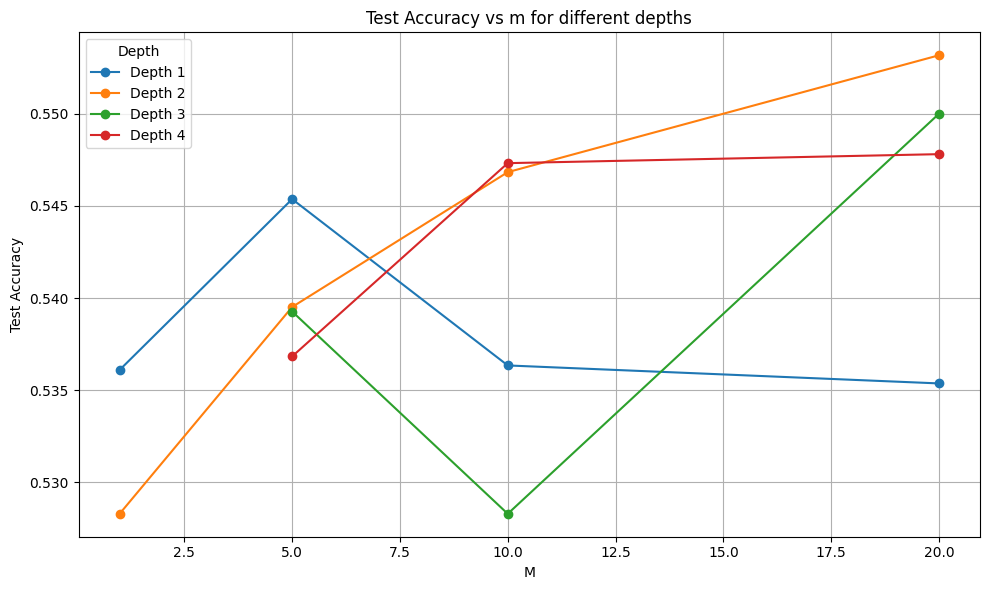

In [17]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
with open("data.json", "r") as f:
    data = json.load(f)

# Collect accuracy values grouped by depth
accuracy_by_depth = defaultdict(list)

for entry in data:
    m = entry[0]
    depth = entry[1]
    accuracy = entry[11]  # test accuracy

    accuracy_by_depth[depth].append((m, accuracy))

# Sort and plot
plt.figure(figsize=(10, 6))

for depth, values in sorted(accuracy_by_depth.items()):
    values.sort()  # sort by m
    ms, accs = zip(*values)
    plt.plot(ms, accs, marker='o', label=f"Depth {depth}")

plt.xlabel("M")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs m for different depths")
plt.legend(title="Depth")
plt.grid(True)
plt.tight_layout()
# plt.savefig("accuracy_vs_m_by_depth.png", dpi=300)
plt.show()


In [10]:
a=1
print(-a)

-1


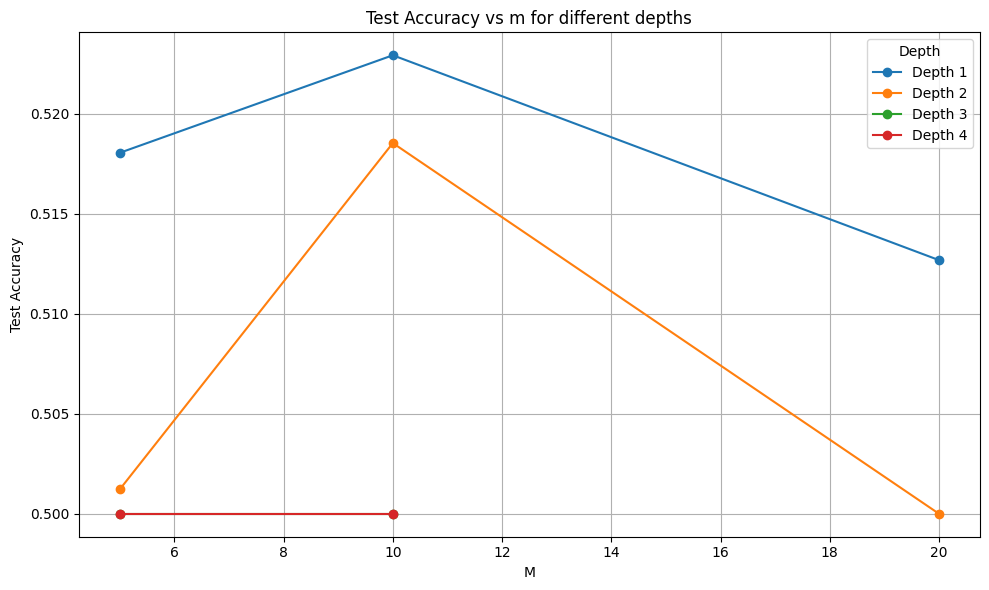

In [23]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
with open("data1.json", "r") as f:
    data = json.load(f)

# Collect accuracy values grouped by depth
accuracy_by_depth = defaultdict(list)

for entry in data:
    m = entry[0]
    depth = entry[1]
    accuracy = entry[11]  # test accuracy

    accuracy_by_depth[depth].append((m, accuracy))

# Sort and plot
plt.figure(figsize=(10, 6))

for depth, values in sorted(accuracy_by_depth.items()):
    values.sort()  # sort by m
    ms, accs = zip(*values)
    plt.plot(ms, accs, marker='o', label=f"Depth {depth}")

plt.xlabel("M")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs m for different depths")
plt.legend(title="Depth")
plt.grid(True)
plt.tight_layout()
# plt.savefig("accuracy_vs_m_by_depth.png", dpi=300)
plt.show()

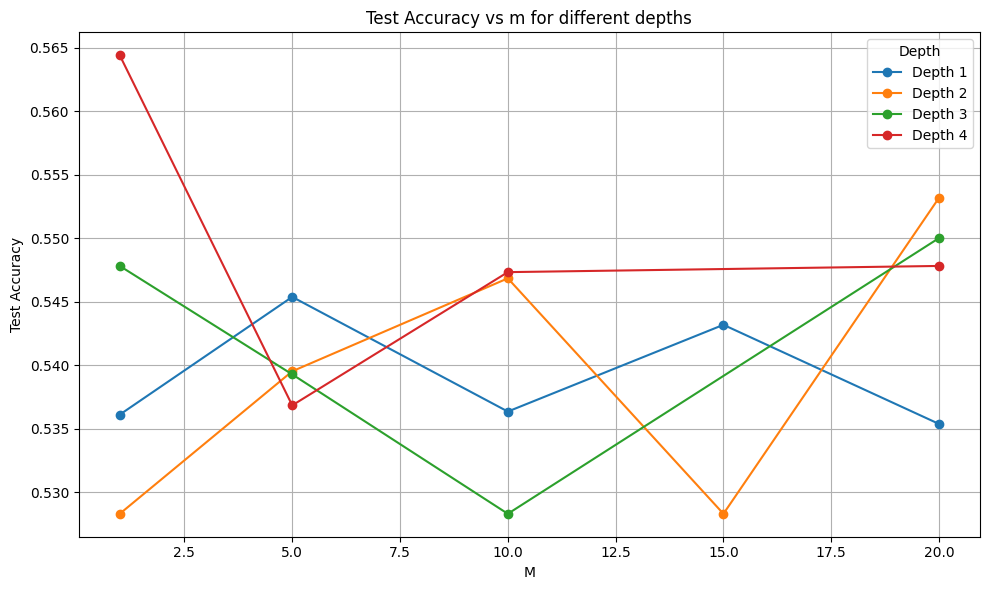

In [24]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
with open("data3.json", "r") as f:
    data = json.load(f)

# Collect accuracy values grouped by depth
accuracy_by_depth = defaultdict(list)

for entry in data:
    m = entry[0]
    depth = entry[1]
    accuracy = entry[11]  # test accuracy

    accuracy_by_depth[depth].append((m, accuracy))

# Sort and plot
plt.figure(figsize=(10, 6))

for depth, values in sorted(accuracy_by_depth.items()):
    values.sort()  # sort by m
    ms, accs = zip(*values)
    plt.plot(ms, accs, marker='o', label=f"Depth {depth}")

plt.xlabel("M")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs m for different depths")
plt.legend(title="Depth")
plt.grid(True)
plt.tight_layout()
# plt.savefig("accuracy_vs_m_by_depth.png", dpi=300)
plt.show()

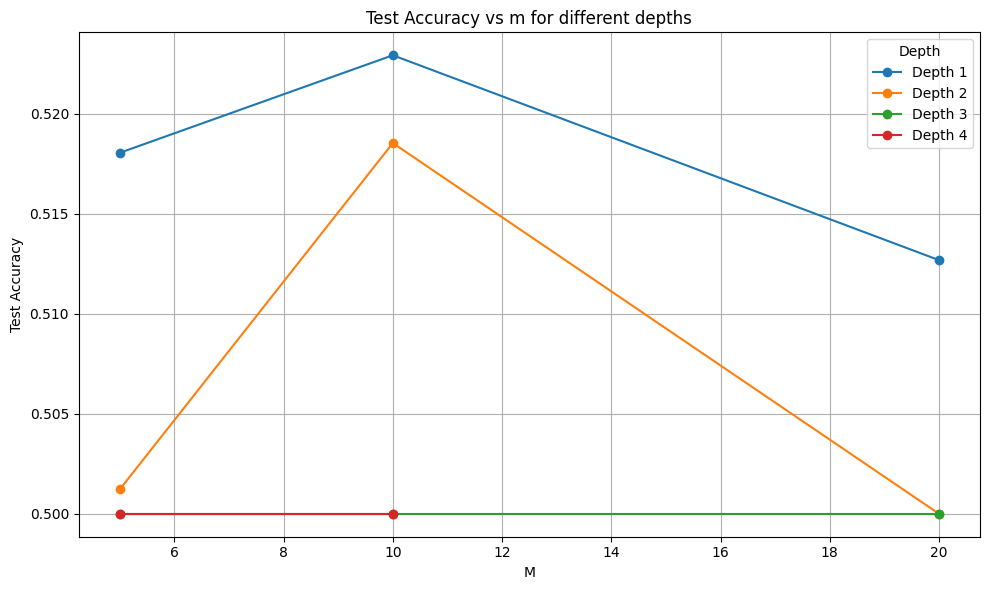

In [25]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

# Load data
with open("data_fixed_layer.json", "r") as f:
    data = json.load(f)

# Collect accuracy values grouped by depth
accuracy_by_depth = defaultdict(list)

for entry in data:
    m = entry[0]
    depth = entry[1]
    accuracy = entry[11]  # test accuracy

    accuracy_by_depth[depth].append((m, accuracy))

# Sort and plot
plt.figure(figsize=(10, 6))

for depth, values in sorted(accuracy_by_depth.items()):
    values.sort()  # sort by m
    ms, accs = zip(*values)
    plt.plot(ms, accs, marker='o', label=f"Depth {depth}")

plt.xlabel("M")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs m for different depths")
plt.legend(title="Depth")
plt.grid(True)
plt.tight_layout()
# plt.savefig("accuracy_vs_m_by_depth.png", dpi=300)
plt.show()